<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/scipylec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Scipy imported! (Submodules: stats, optimize, integrate, etc.)

🔍 1. WHY SCIPY?
NumPy: Basic arrays/math
Scipy: 80+ algorithms (stats tests, optimization, FFT, sparse matrices)
Use case: MSc thesis/research (p-values, curve fit experiments)
Means: 100.3 104.6

📈 2. STATISTICS


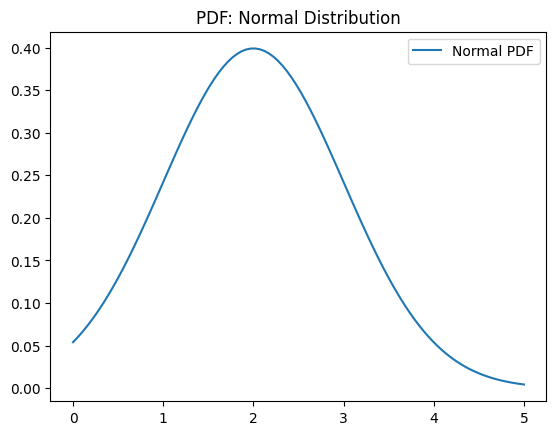

t-test: t=-6.50, p=0.0000
Result: Significant diff!
Pearson r=0.042, p=0.6747
Chi2=2.00, p=0.3679

⚙️ 3. OPTIMIZATION
Min at x=3.84, f(x)=8.32
Fitted: y = 2.52x + 0.88


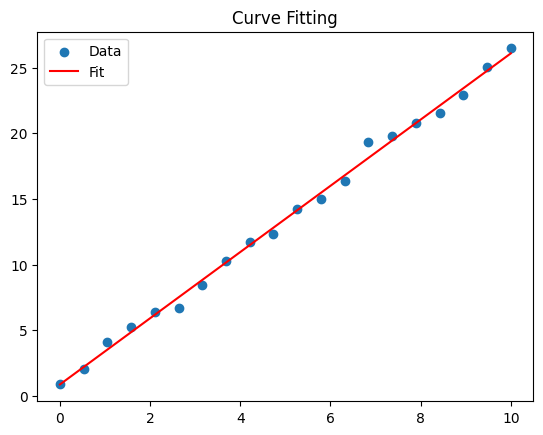


∫ 4. INTEGRATION/NUMERICAL
∫ sin(x)/x dx [0,π] = 1.8519 (err=2.06e-14)


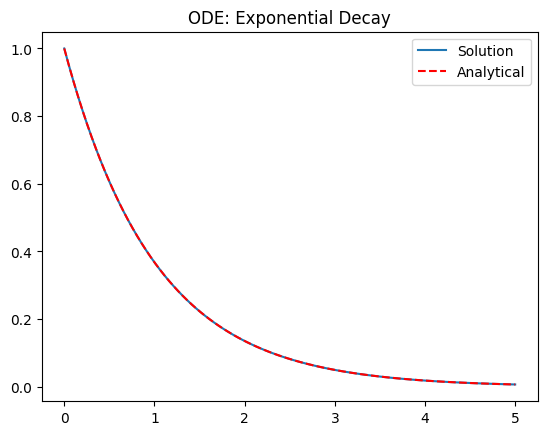


📡 5. SIGNAL PROCESSING


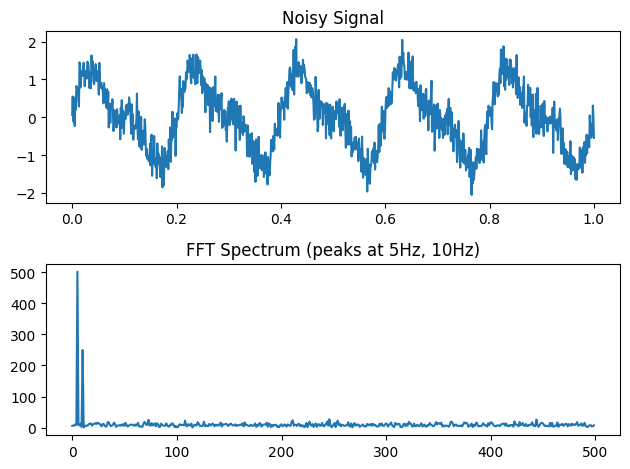

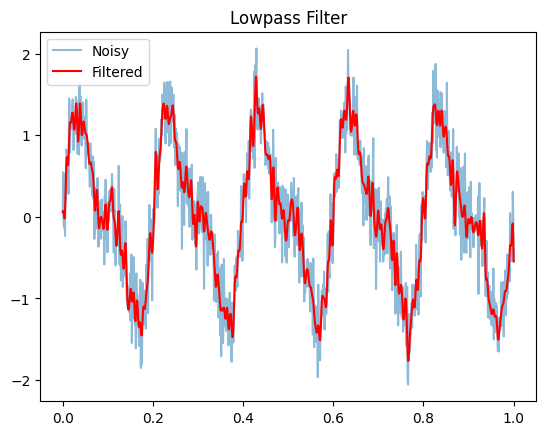


🔢 6. LINEAR ALGEBRA
A =
 [[2 5 8]
 [3 5 7]
 [1 6 4]]
P:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
L:
 [[1.   0.   0.  ]
 [0.33 1.   0.  ]
 [0.67 0.38 1.  ]]
U:
 [[3.   5.   7.  ]
 [0.   4.33 1.67]
 [0.   0.   2.69]]
Reconstruct: P @ L @ U ≈ A? True

SVD singular values: [14.88  2.58  0.91]

🌐 7. SPARSE (BONUS)
Dense:
 [[1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]]
Non-zeros: 4

🎯 8. LAB: A/B Test (20 mins)
Conversion: A=11.76%, B=14.95%
Chi2 test p-value: 0.0000 → Significant!
95% CI A: [11.13%, 12.39%]

📝 9. ASSIGNMENTS

1. Fit polynomial (degree=3) to noisy sine data → optimize.curve_fit
2. Integrate Gaussian PDF [ -3σ, 3σ ] → should ≈1
3. Welch t-test on unequal variance groups → stats.ttest_ind(..., equal_var=False)
4. FFT audio signal (generate chirp) → find dominant freq


🏁 END
Scipy: NumPy + Research Tools → MSc projects/papers
Next: Pandas/Sklearn for full ML pipeline


In [3]:
# =========================================================
# SCIPY LECTURE NOTEBOOK for MSC Computer Science Students
# =========================================================
# Author: AI Assistant (based on CS/Data Science curriculum)
# Level: MSc (post-NumPy; knows arrays/operations)
# Duration: 90 mins
# Prerequisites: NumPy arrays, basic stats
#
# OBJECTIVES:
# 1. Scipy = Scientific Python (NumPy + algorithms)
# 2. Master stats (distributions, tests), optimization, integration, signal processing
# 3. Apply to research tasks (hypothesis testing, curve fitting)
# 4. NumPy vs Scipy comparison
#
# Run sequentially. Builds on NumPy notebook.
# =========================================================

# ===== 0. SETUP & IMPORT =====
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize, integrate, signal, linalg
import seaborn as sns  # Viz helper
print("✅ Scipy imported! (Submodules: stats, optimize, integrate, etc.)")

# ===== 1. WHY SCIPY? (MOTIVATION) =====
print("\n🔍 1. WHY SCIPY?")
print("NumPy: Basic arrays/math")
print("Scipy: 80+ algorithms (stats tests, optimization, FFT, sparse matrices)")
print("Use case: MSc thesis/research (p-values, curve fit experiments)")

# Demo: NumPy mean vs Scipy t-test
data1 = np.random.normal(100, 15, 1000)  # IQ scores group A
data2 = np.random.normal(105, 15, 1000)  # Group B
print("Means:", np.mean(data1).round(1), np.mean(data2).round(1))

# ===== 2. STATISTICS MODULE (scipy.stats) =====
print("\n📈 2. STATISTICS")
# Distributions (PDF/CDF)
x = np.linspace(0, 5, 100)
normal_pdf = stats.norm.pdf(x, loc=2, scale=1)  # N(2,1)
plt.plot(x, normal_pdf, label='Normal PDF')
plt.title('PDF: Normal Distribution')
plt.legend()
plt.show()

# Hypothesis testing (t-test)
t_stat, p_value = stats.ttest_ind(data1, data2)
print(f"t-test: t={t_stat:.2f}, p={p_value:.4f}")
print("Result:", "Significant diff!" if p_value < 0.05 else "No diff")

# Correlation (Pearson)
corr, p_corr = stats.pearsonr(data1[:100], data2[:100])
print(f"Pearson r={corr:.3f}, p={p_corr:.4f}")

# Chi-square test (categorical)
obs = np.array([20, 30, 25])  # Observed frequencies
exp = np.array([25, 25, 25])  # Expected
chi2, p_chi = stats.chisquare(obs, exp)
print(f"Chi2={chi2:.2f}, p={p_chi:.4f}")

# ===== 3. OPTIMIZATION (scipy.optimize) =====
print("\n⚙️ 3. OPTIMIZATION")
# Minimize function (univariate)
def f(x): return x**2 + 10*np.sin(x)  # Cost function
result = optimize.minimize_scalar(f, bounds=(0, 10), method='bounded')
print(f"Min at x={result.x:.2f}, f(x)={result.fun:.2f}")

# Multivariate (curve fitting)
def model(x, a, b): return a * x + b  # Linear
x_data = np.linspace(0, 10, 20)
y_data = model(x_data, 2.5, 1) + np.random.normal(0, 0.5, 20)  # Noisy data

popt, pcov = optimize.curve_fit(model, x_data, y_data)
print(f"Fitted: y = {popt[0]:.2f}x + {popt[1]:.2f}")

plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, model(x_data, *popt), 'r-', label='Fit')
plt.legend()
plt.title('Curve Fitting')
plt.show()

# ===== 4. INTEGRATION (scipy.integrate) =====
print("\n∫ 4. INTEGRATION/NUMERICAL")
# Definite integral
def integrand(x): return np.sin(x) / x if x != 0 else 1
result_quad, err = integrate.quad(integrand, 0, np.pi)
print(f"∫ sin(x)/x dx [0,π] = {result_quad:.4f} (err={err:.2e})")

# ODE solver (differential eq)
from scipy.integrate import odeint
def deriv(y, t): return -y  # dy/dt = -y (exponential decay)
t = np.linspace(0, 5, 100)
y0 = 1
sol = odeint(deriv, y0, t)
plt.plot(t, sol, label='Solution')
plt.plot(t, np.exp(-t), 'r--', label='Analytical')
plt.legend()
plt.title('ODE: Exponential Decay')
plt.show()

# ===== 5. SIGNAL PROCESSING (scipy.signal) =====
print("\n📡 5. SIGNAL PROCESSING")
# Generate noisy signal
t_sig = np.linspace(0, 1, 1000)
signal_clean = np.sin(2 * np.pi * 5 * t_sig) + 0.5 * np.sin(2 * np.pi * 10 * t_sig)
noise = 0.3 * np.random.randn(1000)
signal_noisy = signal_clean + noise

# FFT (frequency analysis)
freq = np.fft.fftfreq(len(t_sig), t_sig[1]-t_sig[0])
fft = np.fft.fft(signal_noisy)
plt.subplot(2,1,1)
plt.plot(t_sig, signal_noisy)
plt.title('Noisy Signal')

plt.subplot(2,1,2)
plt.plot(freq[:len(freq)//2], np.abs(fft)[:len(freq)//2])
plt.title('FFT Spectrum (peaks at 5Hz, 10Hz)')
plt.tight_layout()
plt.show()

# Filter (lowpass)
b, a = signal.butter(4, 0.3)  # 4th order Butterworth
filtered = signal.filtfilt(b, a, signal_noisy)
plt.plot(t_sig, signal_noisy, alpha=0.5, label='Noisy')
plt.plot(t_sig, filtered, 'r', label='Filtered')
plt.legend()
plt.title('Lowpass Filter')
plt.show()

# ===== 6. LINEAR ALGEBRA ADVANCED (scipy.linalg) =====
print("\n🔢 6. LINEAR ALGEBRA")
A_lu = np.array([[2, 5, 8], [3, 5, 7], [1, 6, 4]])
P, L, U = linalg.lu(A_lu)  # LU decomposition
print("A =\n", A_lu)
print("P:\n", P)
print("L:\n", L.round(2))
print("U:\n", U.round(2))
print("Reconstruct: P @ L @ U ≈ A?", np.allclose(P @ L @ U, A_lu))

# SVD (PCA prep)
U_svd, s, Vt = linalg.svd(A_lu)
print("\nSVD singular values:", s.round(2))

# ===== 7. SPARSE MATRICES (BIG DATA) =====
print("\n🌐 7. SPARSE (BONUS)")
from scipy.sparse import csr_matrix
# Sparse: 99% zeros (adjacency matrix)
rows = np.array([0, 1, 2, 3])
cols = np.array([0, 1, 1, 2])
data = np.array([1, 1, 1, 1])
sparse = csr_matrix((data, (rows, cols)), shape=(4, 4))
print("Dense:\n", sparse.toarray())
print("Non-zeros:", sparse.nnz)  # Memory efficient

# ===== 8. PRACTICAL: HYPOTHESIS TESTING LAB =====
print("\n🎯 8. LAB: A/B Test (20 mins)")
# Simulate webpage conversion rates
group_a = np.random.binomial(1, 0.12, 10000)  # 12% convert
group_b = np.random.binomial(1, 0.15, 10000)  # 15% (new design?)

rate_a = np.mean(group_a)
rate_b = np.mean(group_b)
print(f"Conversion: A={rate_a:.2%}, B={rate_b:.2%}")

# Test
chi_stat, chi_p = stats.chi2_contingency(np.array([[np.sum(group_a), np.sum(1-group_a)],
                                                  [np.sum(group_b), np.sum(1-group_b)]]))[:2]
print(f"Chi2 test p-value: {chi_p:.4f} → {'Significant!' if chi_p<0.05 else 'No evidence'}")

# Confidence intervals
lower_ci, upper_ci = stats.binom.interval(0.95, 10000, rate_a)
ci_a = (lower_ci / 10000, upper_ci / 10000)
print(f"95% CI A: [{ci_a[0]:.2%}, {ci_a[1]:.2%}]")

# ===== 9. EXERCISES =====
print("\n📝 9. ASSIGNMENTS")
print("""
1. Fit polynomial (degree=3) to noisy sine data → optimize.curve_fit
2. Integrate Gaussian PDF [ -3σ, 3σ ] → should ≈1
3. Welch t-test on unequal variance groups → stats.ttest_ind(..., equal_var=False)
4. FFT audio signal (generate chirp) → find dominant freq
""")

print("\n🏁 END")
print("Scipy: NumPy + Research Tools → MSc projects/papers")
print("Next: Pandas/Sklearn for full ML pipeline")
